In [1]:
from hwr.data.reader import IAMReader
from hwr.constants import SPLIT
import random

In [2]:
# Read samples from test split
reader = IAMReader(SPLIT.TEST)
samples = reader.get_samples()

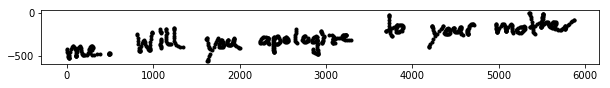

(<PointSet w=5874 h=564 points_len=704>,
 'me . Will you apologize to your mother ')

In [3]:
# Plot random sample and the ground truth
sample = random.choice(samples)
pts = sample.pointset
pts.plot_samples()
pts, sample.get_ground_truth_text()

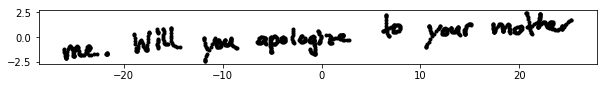

<PointSet w=5874 h=564 points_len=704>

In [4]:
# normalization based on y-axis. Unit variance and zero mean.
# y follow x variance to preserve aspect ratio.
pts.normalize_points()
pts.plot_samples()
pts

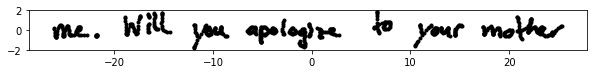

<PointSet w=5874 h=564 points_len=704>

In [5]:
pts.slope_correction()
pts.plot_samples()
pts

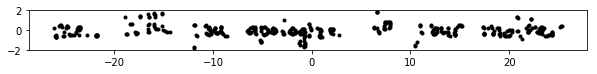

<PointSet w=5874 h=564 points_len=428>

In [6]:
# Downsampling based on angle. Cosine similarity of two adjacent line
# Use before resampling for line smoothing
pts.down_sample_angle(cos_th=0.975)
pts.plot_samples()
pts

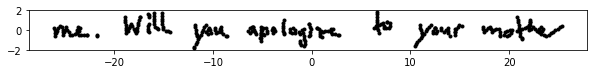

<PointSet w=5874 h=564 points_len=326>

In [7]:
# Resampling along stroke with interval d
pts.resample_distance(d=0.275)
pts.plot_samples()
pts

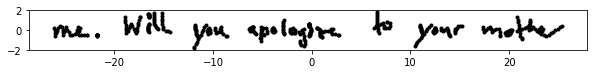

<PointSet w=5874 h=564 points_len=417>

In [8]:
# Up sample short stroke to at least the argument value.
# to increase signifiance of short stroke like ",", "." etc
pts.up_sample_short_stroke(n=10)
pts.plot_samples()
pts

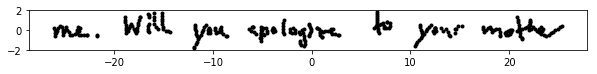

<PointSet w=5874 h=564 points_len=318>

In [9]:
# Downsampling based on distance. Remove next point if within d_th distance.
pts.down_sample_distance(d_th=0.2)
pts.plot_samples()
pts

In [10]:
# Features based on each line connecting two points.
# Each line contains 6 features: (start_x, start_y, direction_x, direction_y, down, up)
features = pts.generate_features()
print("Example features:\n {}".format(features[:2]))

Example features:
 [[-26.08100724  -0.22126328   0.03713684   0.27248093   1.
    0.        ]
 [-26.04387041   0.05121765   0.03713684   0.27248093   1.
    0.        ]]
